In [21]:
import pandas as pd
import csv
import os
import json
import numpy as np
from citipy import citipy
import requests
import matplotlib.pyplot as plt
import plotly.express as px

In [26]:
results_df = pd.read_csv("WeatherPy/results.csv")
results_df

,Unnamed: 0,City,ID,Latitude,Longitude,Max Temp,Humidity,Wind Speed,Cloudiness
0,0,Ushuaia,3833367,-54.8000,-68.3000,51.80,66,12.66,75
1,1,Lebu,3883457,-37.6167,-73.6500,62.08,78,23.73,0
2,2,Busselton,2075265,-33.6500,115.3333,68.00,61,6.71,9
3,3,Ngunguru,2186111,-35.6167,174.5000,78.01,61,13.00,31
4,4,Ginir,336454,7.1333,40.7000,59.72,44,11.14,11
...,...,...,...,...,...,...,...,...,...
689,689,Port Washington,5132029,40.8257,-73.6982,44.01,59,3.00,64
690,690,Shellbrook,6145951,53.2168,-106.4011,19.40,86,5.75,90
691,691,Tocoa,3600704,15.6833,-86.0000,75.20,88,4.61,90
692,692,Firovo,562627,57.4814,33.7021,7.03,95,2.86,83


In [27]:
results_df_filtered = results_df[(results_df["Max Temp"] <80) & (results_df["Max Temp"] >70) & (results_df["Wind Speed"] <10) & (results_df["Cloudiness"] == 0)]
results_df_filtered

,Unnamed: 0,City,ID,Latitude,Longitude,Max Temp,Humidity,Wind Speed,Cloudiness
137,137,Cachoeira,3468535,-12.6183,-38.9558,74.14,75,6.82,0
143,143,Saucillo,3983312,28.0167,-105.2833,79.14,15,8.52,0
350,350,Gaoua,2577162,10.2992,-3.2508,76.68,18,4.34,0
426,426,Diapaga,2361373,12.0708,1.7889,73.49,20,7.43,0
470,470,Necochea,3430443,-38.5473,-58.7368,73.99,65,6.76,0
530,530,Guerrero Negro,4021858,27.9769,-114.0611,76.28,22,9.89,0
552,552,Departamento de Maldonado,3441890,-34.6667,-54.9167,73.40,64,6.91,0
565,565,Alice Springs,2077895,-23.7000,133.8833,77.00,37,4.61,0
602,602,Ouahigouya,2357043,13.5828,-2.4216,75.42,18,9.37,0
639,639,Bosobolo,2316473,4.1833,19.9000,75.33,40,1.72,0


In [28]:
hotels_df=results_df_filtered.copy()
hotels_df["Hotel Name"]= ""
hotels_df

,Unnamed: 0,City,ID,Latitude,Longitude,Max Temp,Humidity,Wind Speed,Cloudiness,Hotel Name
137,137,Cachoeira,3468535,-12.6183,-38.9558,74.14,75,6.82,0,
143,143,Saucillo,3983312,28.0167,-105.2833,79.14,15,8.52,0,
350,350,Gaoua,2577162,10.2992,-3.2508,76.68,18,4.34,0,
426,426,Diapaga,2361373,12.0708,1.7889,73.49,20,7.43,0,
470,470,Necochea,3430443,-38.5473,-58.7368,73.99,65,6.76,0,
530,530,Guerrero Negro,4021858,27.9769,-114.0611,76.28,22,9.89,0,
552,552,Departamento de Maldonado,3441890,-34.6667,-54.9167,73.40,64,6.91,0,
565,565,Alice Springs,2077895,-23.7000,133.8833,77.00,37,4.61,0,
602,602,Ouahigouya,2357043,13.5828,-2.4216,75.42,18,9.37,0,
639,639,Bosobolo,2316473,4.1833,19.9000,75.33,40,1.72,0,


In [31]:
os.chdir("../python-api-challenge")

In [32]:
from config import google_key
from config import mapbox_token

In [33]:
# understaning index,row within a loop - 
# this is needed here because we need to grab the first hotel return from the google api and populate
# the hotel_df and indexing that dataframe will be easier with "index" within the loop
for index,row in hotels_df.iterrows():
    lat=row["Latitude"]
    lng=row["Longitude"]
    name_address=requests.get("https://maps.googleapis.com/maps/api/place/nearbysearch/json?", params={
            "location": f"{lat},{lng}",
            "radius": 5000,
            "types": "lodging",
            "key": google_key
            })
    name_address=name_address.json()
    try:
        
        hotels_df.loc[index,"Hotel Name"]=name_address["results"][0]["name"]
    except (KeyError, IndexError):
        print("missing field - skipping")
    

missing field - skipping
missing field - skipping
missing field - skipping


In [34]:
hotels_df

,Unnamed: 0,City,ID,Latitude,Longitude,Max Temp,Humidity,Wind Speed,Cloudiness,Hotel Name
137,137,Cachoeira,3468535,-12.6183,-38.9558,74.14,75,6.82,0,Cachoeira Apart Hotel
143,143,Saucillo,3983312,28.0167,-105.2833,79.14,15,8.52,0,Hotel La Posada de San Judas Tadeo
350,350,Gaoua,2577162,10.2992,-3.2508,76.68,18,4.34,0,
426,426,Diapaga,2361373,12.0708,1.7889,73.49,20,7.43,0,
470,470,Necochea,3430443,-38.5473,-58.7368,73.99,65,6.76,0,dyd -mar Hotel
530,530,Guerrero Negro,4021858,27.9769,-114.0611,76.28,22,9.89,0,"Casa Laguna, Bed & Breakfast"
552,552,Departamento de Maldonado,3441890,-34.6667,-54.9167,73.40,64,6.91,0,La Cimarrona
565,565,Alice Springs,2077895,-23.7000,133.8833,77.00,37,4.61,0,Desert Palms Alice Springs
602,602,Ouahigouya,2357043,13.5828,-2.4216,75.42,18,9.37,0,Hotel Liberte
639,639,Bosobolo,2316473,4.1833,19.9000,75.33,40,1.72,0,


In [35]:
hotels_df.to_csv("VacationPy/hotels.csv")

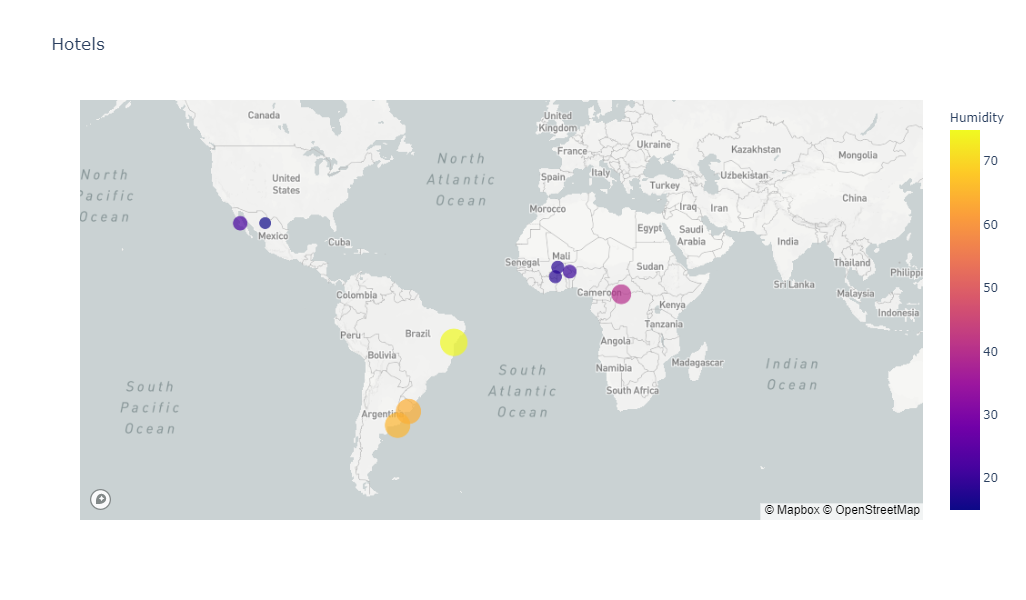

In [36]:
px.set_mapbox_access_token(mapbox_token)
fig_map_hotels= px.scatter_mapbox(
    hotels_df,
    lat="Latitude",
    lon="Longitude",
    title="Hotels",
    color="Humidity",
    size="Humidity",
    hover_data=["Hotel Name", "City", ],
    zoom=1,
    height=600,
    width=1000,
)
fig_map_hotels.write_image("figures/hotel_map.png")
fig_map_hotels.show()